### Import Libraries

In [1]:
import numpy as np
import pandas as pd

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Logistic Regression
from sklearn.linear_model import LogisticRegression

# Random forest classifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier

from sklearn.metrics import multilabel_confusion_matrix,accuracy_score,classification_report,confusion_matrix

from sklearn.tree import DecisionTreeClassifier,plot_tree

### Problem Statement

### Data Gathering

In [2]:
df = pd.read_excel(r"C:\Users\manea\OneDrive\Desktop\DATASCIENCE\MACHINE LEARNING\DATASETS\RAISINS\Raisin_Dataset\Raisin_Dataset.xlsx")
df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,Besni
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,Besni
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,Besni
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,Besni


### EDA (Exploratory Data Analysis)

In [3]:
# Size

df.shape

(900, 8)

In [4]:
# check for info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [5]:
# Check For stats

df.describe()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,87804.127778,430.929950,254.488133,0.781542,91186.090000,0.699508,1165.906636
std,39002.111390,116.035121,49.988902,0.090318,40769.290132,0.053468,273.764315
min,25387.000000,225.629541,143.710872,0.348730,26139.000000,0.379856,619.074000
25%,59348.000000,345.442898,219.111126,0.741766,61513.250000,0.670869,966.410750
50%,78902.000000,407.803951,247.848409,0.798846,81651.000000,0.707367,1119.509000
75%,105028.250000,494.187014,279.888575,0.842571,108375.750000,0.734991,1308.389750
max,235047.000000,997.291941,492.275279,0.962124,278217.000000,0.835455,2697.753000


<Axes: xlabel='Area', ylabel='Density'>

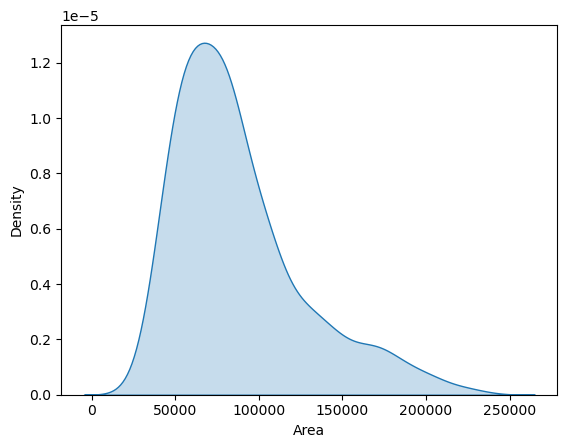

In [6]:
sns.kdeplot(df["Area"], fill= True)

<Axes: xlabel='MajorAxisLength', ylabel='Density'>

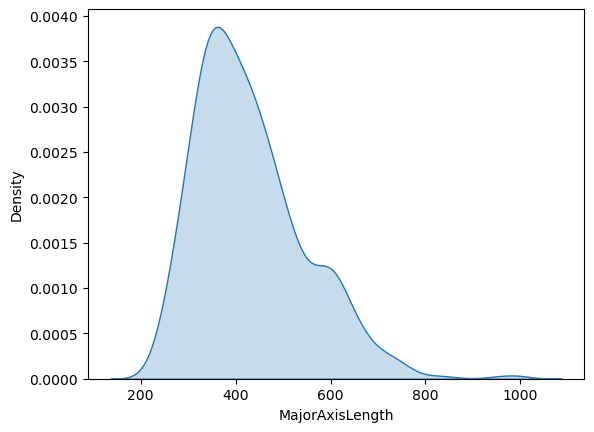

In [7]:
sns.kdeplot(df["MajorAxisLength"], fill= True)

<Axes: xlabel='MinorAxisLength', ylabel='Density'>

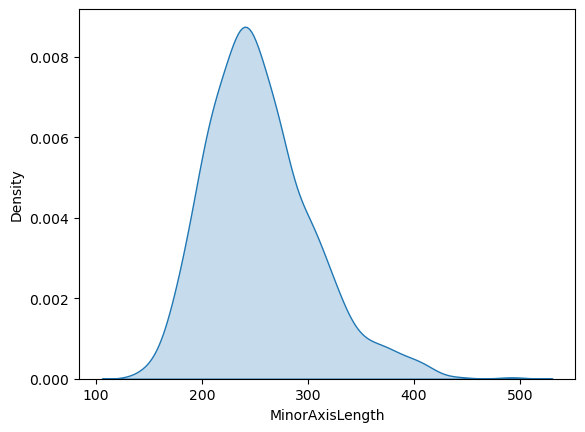

In [8]:
sns.kdeplot(df["MinorAxisLength"], fill= True)

<Axes: ylabel='Eccentricity'>

C:\Users\manea\anaconda3\PYTHON\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 5.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


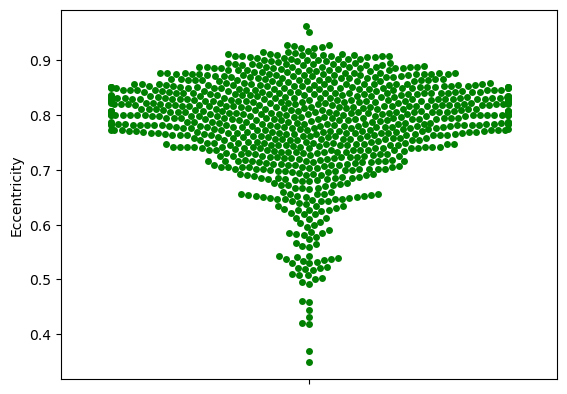

In [9]:
sns.swarmplot(df["Eccentricity"],color="green")

<Axes: xlabel='ConvexArea', ylabel='Count'>

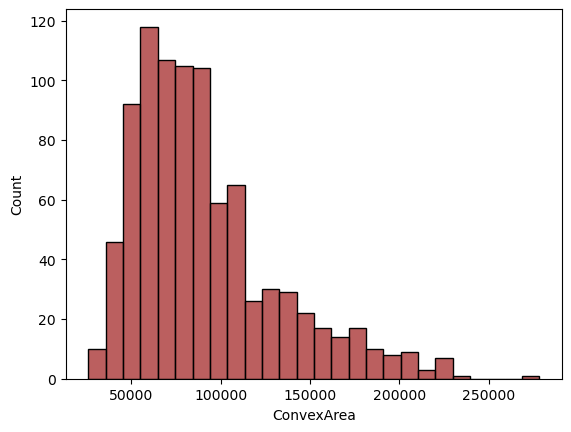

In [10]:
sns.histplot(df["ConvexArea"],color="brown")

<Axes: xlabel='Extent', ylabel='Count'>

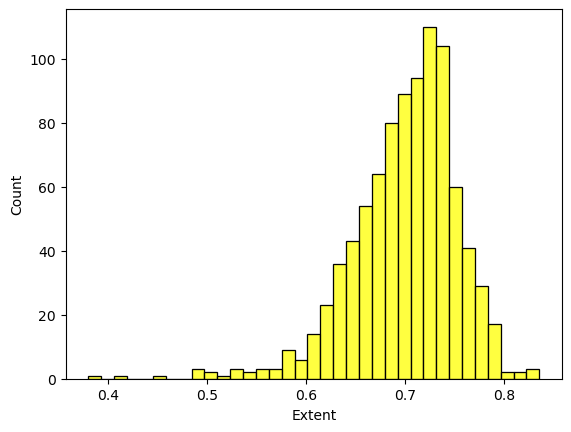

In [11]:
sns.histplot(df["Extent"],color="yellow")

<Axes: xlabel='Perimeter', ylabel='Count'>

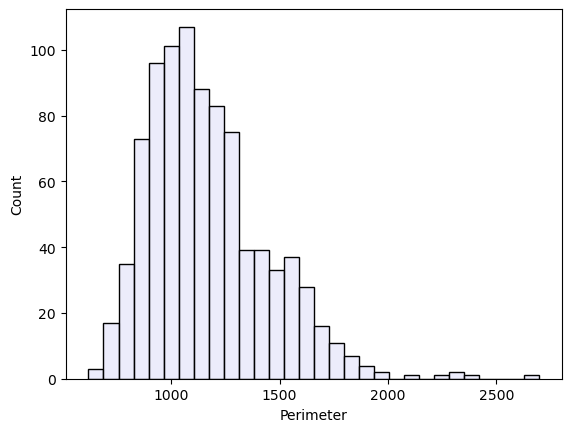

In [12]:
sns.histplot(df["Perimeter"],color="lavender")

In [13]:
# Checking for missing values

df.isnull().sum()  # Zero missing values

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

In [14]:
 # checking for unique values in target column

df["Class"].unique()

array(['Kecimen', 'Besni'], dtype=object)

<Axes: xlabel='Class', ylabel='count'>

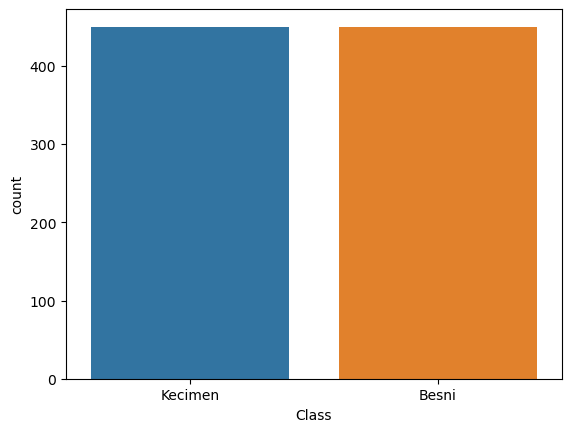

In [15]:
# Count of two different class of Raisins

sns.countplot(x=df["Class"],)

### Checking and Handling of outliers

<Axes: >

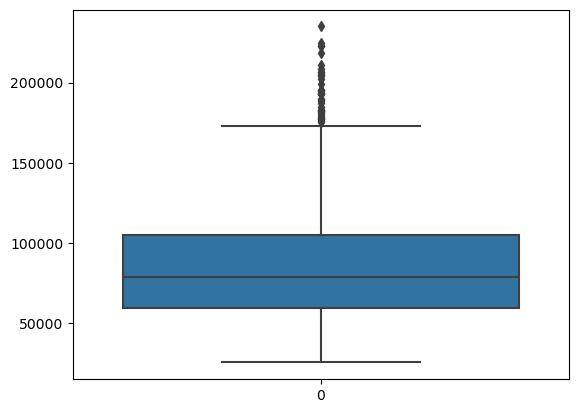

In [16]:
sns.boxplot(df["Area"])  # outliers are present

In [17]:
q1 = df["Area"].quantile(0.25)
q2 = df["Area"].quantile(0.50)
q3 = df["Area"].quantile(0.75)

iqr = q3-q1

In [18]:
lowertail = q1 - 1.5*iqr
lowertail

-9172.375

In [19]:
uppertail = q3 + 1.5*iqr
uppertail

173548.625

In [20]:
df[(df["Area"] < lowertail) | (df["Area"] > uppertail)]

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
85,180898,843.956653,323.190569,0.923770,221396,0.454189,2253.557,Kecimen
467,184784,740.108710,320.587830,0.901316,192699,0.645353,1791.568,Besni
469,195383,755.012914,335.790452,0.895656,204472,0.728769,1893.414,Besni
475,177264,619.958472,366.763240,0.806237,180994,0.683219,1652.694,Besni
479,189637,636.752437,403.719328,0.773310,209580,0.613785,1870.280,Besni
487,210923,984.045491,367.279532,0.927737,278217,0.507352,2697.753,Besni
506,182160,997.291941,271.872395,0.962124,221527,0.379856,2303.690,Besni
507,208264,675.098345,395.579291,0.810341,212813,0.771748,1755.167,Besni
515,188651,621.012686,390.307613,0.777808,192922,0.747156,1698.394,Besni
516,202118,684.602958,379.719282,0.832080,209242,0.717219,1827.900,Besni


In [21]:
# now we will replace the outliers with mean of the above data

mean_without_outliers_A = df[(df["Area"]<uppertail) & (df["Area"] > lowertail)]["Area"].mean()

mean_without_outliers_A

82722.30616996507

In [22]:
# Replacing the outliers

df.loc[df["Area"] > uppertail,"Area"] = mean_without_outliers_A
df.loc[df["Area"] < lowertail,"Area"] = mean_without_outliers_A
df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524.0,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166.0,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856.0,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928.0,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408.0,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen
...,...,...,...,...,...,...,...,...
895,83248.0,430.077308,247.838695,0.817263,85839,0.668793,1129.072,Besni
896,87350.0,440.735698,259.293149,0.808629,90899,0.636476,1214.252,Besni
897,99657.0,431.706981,298.837323,0.721684,106264,0.741099,1292.828,Besni
898,93523.0,476.344094,254.176054,0.845739,97653,0.658798,1258.548,Besni


<Axes: >

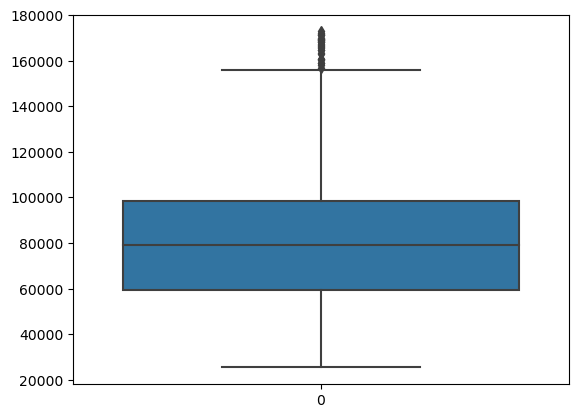

In [23]:
sns.boxplot(df["Area"])  # Outliers replaced

In [24]:
df[(df["Area"] < lowertail) | (df["Area"] > uppertail)]  # Outliers replaced

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class


<Axes: >

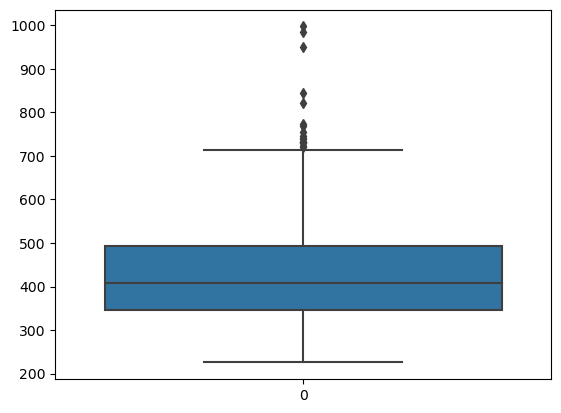

In [25]:
sns.boxplot(df["MajorAxisLength"])  # outliers are present

In [26]:
q1 = df["MajorAxisLength"].quantile(0.25)
q2 = df["MajorAxisLength"].quantile(0.50)
q3 = df["MajorAxisLength"].quantile(0.75)

iqr = q3-q1

In [27]:
lowertail = q1 - 1.5*iqr
lowertail

122.3267235374999

In [28]:
uppertail = q3 + 1.5*iqr
uppertail

717.3031882375001

In [29]:
df[(df["MajorAxisLength"] < lowertail) | (df["MajorAxisLength"] > uppertail)]

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
85,82722.30617,843.956653,323.190569,0.923770,221396,0.454189,2253.557,Kecimen
290,136340.00000,722.853917,311.341355,0.902490,176818,0.529774,2098.263,Kecimen
467,82722.30617,740.108710,320.587830,0.901316,192699,0.645353,1791.568,Besni
469,82722.30617,755.012914,335.790452,0.895656,204472,0.728769,1893.414,Besni
487,82722.30617,984.045491,367.279532,0.927737,278217,0.507352,2697.753,Besni
506,82722.30617,997.291941,271.872395,0.962124,221527,0.379856,2303.690,Besni
509,169009.00000,719.505878,301.565126,0.907927,174718,0.716927,1781.378,Besni
540,168620.00000,730.760960,295.500462,0.914594,172003,0.796730,1725.003,Besni
574,82722.30617,769.425149,321.685834,0.908407,197851,0.605916,1865.297,Besni
634,169645.00000,731.561876,299.413405,0.912409,174278,0.755516,1753.016,Besni


In [30]:
# now we will replace the outliers with mean of the above data

mean_without_outliers_MA = df[(df["MajorAxisLength"]<uppertail) & (df["MajorAxisLength"] > lowertail)]["MajorAxisLength"].mean()

mean_without_outliers_MA

423.952366484598

In [31]:
# Replacing the outliers

df.loc[df["MajorAxisLength"] > uppertail,"MajorAxisLength"] = mean_without_outliers_MA
df.loc[df["MajorAxisLength"] < lowertail,"MajorAxisLength"] = mean_without_outliers_MA
df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524.0,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166.0,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856.0,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928.0,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408.0,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen
...,...,...,...,...,...,...,...,...
895,83248.0,430.077308,247.838695,0.817263,85839,0.668793,1129.072,Besni
896,87350.0,440.735698,259.293149,0.808629,90899,0.636476,1214.252,Besni
897,99657.0,431.706981,298.837323,0.721684,106264,0.741099,1292.828,Besni
898,93523.0,476.344094,254.176054,0.845739,97653,0.658798,1258.548,Besni


<Axes: >

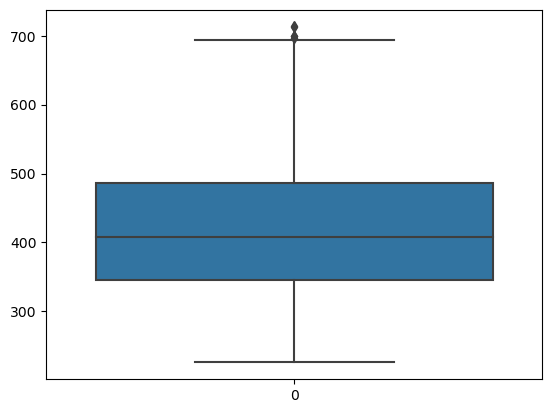

In [32]:
sns.boxplot(df["MajorAxisLength"])  # Outliers replaced

In [33]:
df[(df["MajorAxisLength"] < lowertail) | (df["MajorAxisLength"] > uppertail)] # Outliers replaced

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class


<Axes: >

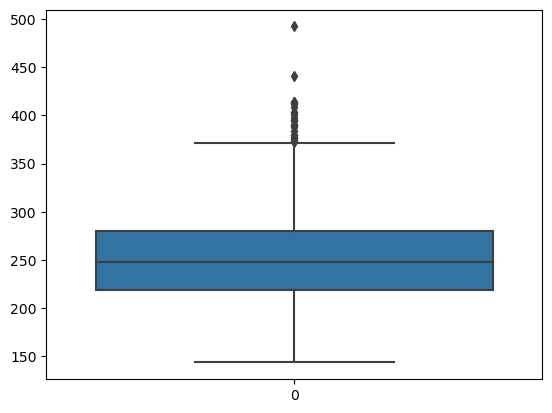

In [34]:
sns.boxplot(df["MinorAxisLength"])  # outliers are present

In [35]:
q1 = df["MinorAxisLength"].quantile(0.25)
q2 = df["MinorAxisLength"].quantile(0.50)
q3 = df["MinorAxisLength"].quantile(0.75)

iqr = q3-q1

In [36]:
lowertail = q1 - 1.5*iqr
lowertail

127.94495428749994

In [37]:
uppertail = q3 + 1.5*iqr
uppertail

371.0547467875001

In [38]:
df[(df["MinorAxisLength"] < lowertail) | (df["MinorAxisLength"] > uppertail)]

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
479,82722.30617,636.752437,403.719328,0.773310,209580,0.613785,1870.280,Besni
490,171256.00000,531.373205,412.382817,0.630647,174277,0.701915,1559.214,Besni
500,143386.00000,469.276508,397.310190,0.532160,146328,0.750260,1422.014,Besni
507,82722.30617,675.098345,395.579291,0.810341,212813,0.771748,1755.167,Besni
515,82722.30617,621.012686,390.307613,0.777808,192922,0.747156,1698.394,Besni
516,82722.30617,684.602958,379.719282,0.832080,209242,0.717219,1827.900,Besni
541,82722.30617,661.148771,376.432193,0.822088,197672,0.631121,1744.271,Besni
552,82722.30617,596.639802,440.497127,0.674476,209457,0.751009,1726.246,Besni
580,82722.30617,713.472549,373.642544,0.851905,210114,0.780576,1866.091,Besni
581,82722.30617,632.727607,414.188326,0.755969,209486,0.769289,1736.839,Besni


In [39]:
# now we will replace the outliers with mean of the above data

mean_without_outliers_Ma = df[(df["MinorAxisLength"]<uppertail) & (df["MinorAxisLength"] > lowertail)]["MinorAxisLength"].mean()

mean_without_outliers_Ma

250.2254616981693

In [40]:
# Replacing the outliers

df.loc[df["MinorAxisLength"] > uppertail,"MinorAxisLength"] = mean_without_outliers_Ma
df.loc[df["MinorAxisLength"] < lowertail,"MinorAxisLength"] = mean_without_outliers_Ma
df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524.0,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166.0,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856.0,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928.0,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408.0,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen
...,...,...,...,...,...,...,...,...
895,83248.0,430.077308,247.838695,0.817263,85839,0.668793,1129.072,Besni
896,87350.0,440.735698,259.293149,0.808629,90899,0.636476,1214.252,Besni
897,99657.0,431.706981,298.837323,0.721684,106264,0.741099,1292.828,Besni
898,93523.0,476.344094,254.176054,0.845739,97653,0.658798,1258.548,Besni


<Axes: >

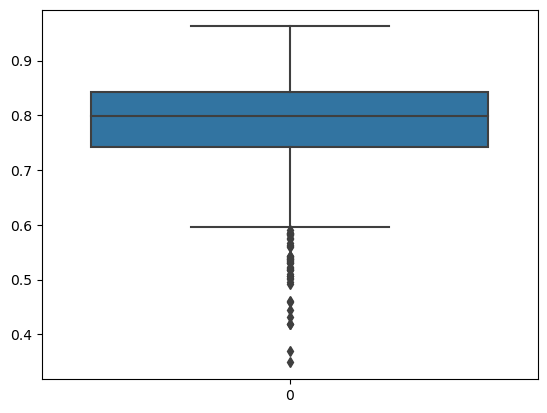

In [41]:
sns.boxplot(df["Eccentricity"])  # outliers are present

In [42]:
q1 = df["Eccentricity"].quantile(0.25)
q2 = df["Eccentricity"].quantile(0.50)
q3 = df["Eccentricity"].quantile(0.75)

iqr = q3-q1

In [43]:
lowertail = q1 - 1.5*iqr
lowertail

0.5905590993750001

In [44]:
uppertail = q3 + 1.5*iqr
uppertail

0.9937781783749999

In [45]:
df[(df["Eccentricity"] < lowertail) | (df["Eccentricity"] > uppertail)]

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
4,79408.00000,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen
13,76792.00000,338.857545,291.359202,0.510584,78842,0.772322,1042.770,Kecimen
23,61251.00000,301.507790,273.659941,0.419754,64732,0.643596,971.769,Kecimen
26,73167.00000,340.055218,276.015177,0.584106,74545,0.778737,1010.474,Kecimen
28,81021.00000,347.750058,297.640626,0.517135,82552,0.757560,1063.868,Kecimen
34,46427.00000,253.842028,235.906824,0.369212,48275,0.684219,844.312,Kecimen
35,40861.00000,249.740227,213.573272,0.518328,43096,0.743089,784.912,Kecimen
43,92384.00000,368.406214,320.714579,0.492087,93772,0.749007,1135.662,Kecimen
58,69060.00000,328.488861,275.888865,0.542783,72223,0.727024,1039.551,Kecimen
83,98935.00000,387.516938,326.898724,0.537015,100747,0.740421,1176.600,Kecimen


In [46]:
# now we will replace the outliers with mean of the above data

mean_without_outliers_E = df[(df["Eccentricity"]<uppertail) & (df["Eccentricity"] > lowertail)]["Eccentricity"].mean()

mean_without_outliers_E

0.7947552922567094

In [47]:
# Replacing the outliers

df.loc[df["Eccentricity"] > uppertail,"Eccentricity"]= mean_without_outliers_E  
df.loc[df["Eccentricity"] < lowertail,"Eccentricity"] = mean_without_outliers_E
df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524.0,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166.0,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856.0,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928.0,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408.0,352.190770,290.827533,0.794755,81463,0.792772,1073.251,Kecimen
...,...,...,...,...,...,...,...,...
895,83248.0,430.077308,247.838695,0.817263,85839,0.668793,1129.072,Besni
896,87350.0,440.735698,259.293149,0.808629,90899,0.636476,1214.252,Besni
897,99657.0,431.706981,298.837323,0.721684,106264,0.741099,1292.828,Besni
898,93523.0,476.344094,254.176054,0.845739,97653,0.658798,1258.548,Besni


<Axes: >

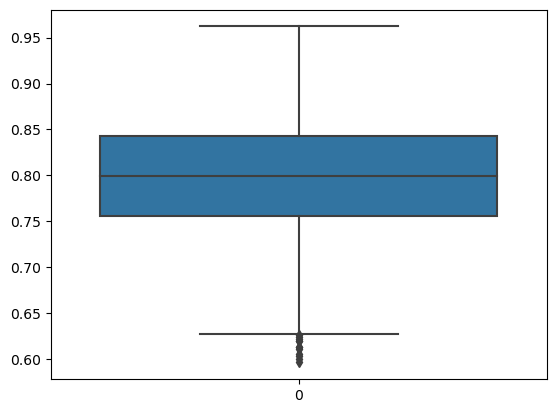

In [48]:
sns.boxplot(df["Eccentricity"])  # Outliers replaced

In [49]:
df[(df["Eccentricity"] < lowertail) | (df["Eccentricity"] > uppertail)] # Outliers replaced

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class


<Axes: >

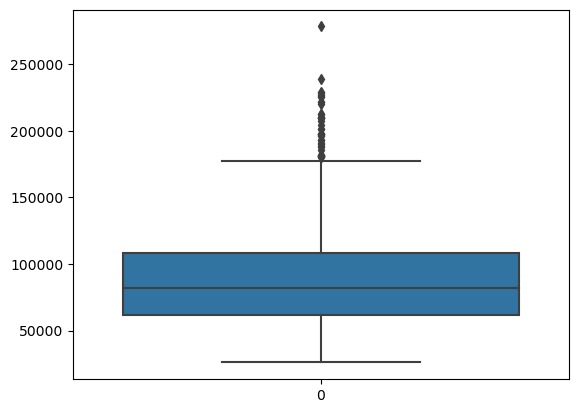

In [50]:
sns.boxplot(df["ConvexArea"])  # outliers are present

In [51]:
q1 = df["ConvexArea"].quantile(0.25)
q2 = df["ConvexArea"].quantile(0.50)
q3 = df["ConvexArea"].quantile(0.75)

iqr = q3-q1

In [52]:
lowertail = q1 - 1.5*iqr
lowertail

-8780.5

In [53]:
uppertail = q3 + 1.5*iqr
uppertail

178669.5

In [54]:
df[(df["ConvexArea"] < lowertail) | (df["ConvexArea"] > uppertail)]

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
85,82722.30617,423.952366,323.190569,0.923770,221396,0.454189,2253.557,Kecimen
467,82722.30617,423.952366,320.587830,0.901316,192699,0.645353,1791.568,Besni
469,82722.30617,423.952366,335.790452,0.895656,204472,0.728769,1893.414,Besni
475,82722.30617,619.958472,366.763240,0.806237,180994,0.683219,1652.694,Besni
479,82722.30617,636.752437,250.225462,0.773310,209580,0.613785,1870.280,Besni
487,82722.30617,423.952366,367.279532,0.927737,278217,0.507352,2697.753,Besni
506,82722.30617,423.952366,271.872395,0.962124,221527,0.379856,2303.690,Besni
507,82722.30617,675.098345,250.225462,0.810341,212813,0.771748,1755.167,Besni
515,82722.30617,621.012686,250.225462,0.777808,192922,0.747156,1698.394,Besni
516,82722.30617,684.602958,250.225462,0.832080,209242,0.717219,1827.900,Besni


In [55]:
# now we will replace the outliers with mean of the above data

mean_without_outliers_CA = df[(df["ConvexArea"]<uppertail) & (df["ConvexArea"] > lowertail)]["ConvexArea"].mean()

mean_without_outliers_CA

85668.7027972028

In [56]:
# Replacing the outliers

df.loc[df["ConvexArea"] > uppertail,"ConvexArea"]= mean_without_outliers_CA  
df.loc[df["ConvexArea"] < lowertail,"ConvexArea"] = mean_without_outliers_CA
df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524.0,442.246011,253.291155,0.819738,90546.0,0.758651,1184.040,Kecimen
1,75166.0,406.690687,243.032436,0.801805,78789.0,0.684130,1121.786,Kecimen
2,90856.0,442.267048,266.328318,0.798354,93717.0,0.637613,1208.575,Kecimen
3,45928.0,286.540559,208.760042,0.684989,47336.0,0.699599,844.162,Kecimen
4,79408.0,352.190770,290.827533,0.794755,81463.0,0.792772,1073.251,Kecimen
...,...,...,...,...,...,...,...,...
895,83248.0,430.077308,247.838695,0.817263,85839.0,0.668793,1129.072,Besni
896,87350.0,440.735698,259.293149,0.808629,90899.0,0.636476,1214.252,Besni
897,99657.0,431.706981,298.837323,0.721684,106264.0,0.741099,1292.828,Besni
898,93523.0,476.344094,254.176054,0.845739,97653.0,0.658798,1258.548,Besni


<Axes: >

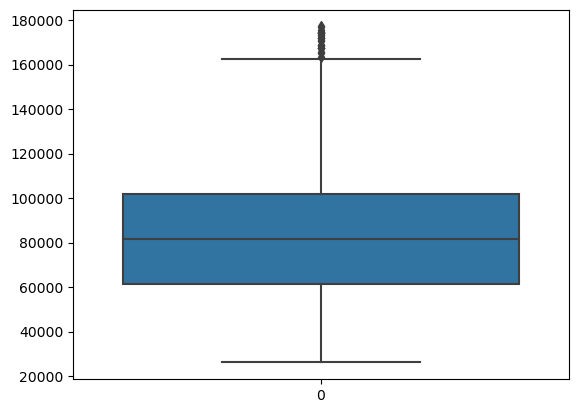

In [57]:
sns.boxplot(df["ConvexArea"])  # Outliers replaced

In [58]:
df[(df["ConvexArea"] < lowertail) | (df["ConvexArea"] > uppertail)]

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class


<Axes: >

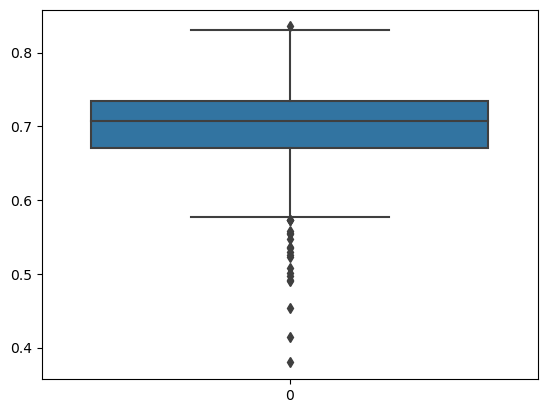

In [59]:
sns.boxplot(df["Extent"])  # outliers are present

In [60]:
q1 = df["Extent"].quantile(0.25)
q2 = df["Extent"].quantile(0.50)
q3 = df["Extent"].quantile(0.75)

iqr = q3-q1

In [61]:
lowertail = q1 - 1.5*iqr
lowertail

0.574685616

In [62]:
uppertail = q3 + 1.5*iqr
uppertail

0.831174898

In [63]:
df[(df["Extent"] < lowertail) | (df["Extent"] > uppertail)]

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
85,82722.30617,423.952366,323.190569,0.923770,85668.702797,0.454189,2253.557,Kecimen
113,50545.00000,286.871332,227.159717,0.610713,51771.000000,0.835455,847.664,Kecimen
238,41593.00000,310.674892,178.323287,0.818865,44753.000000,0.572670,870.063,Kecimen
290,136340.00000,423.952366,311.341355,0.902490,176818.000000,0.529774,2098.263,Kecimen
459,83107.00000,507.380899,233.153850,0.888165,93706.000000,0.491002,1367.331,Besni
466,97019.00000,559.599213,228.641753,0.912722,101539.000000,0.573453,1383.647,Besni
487,82722.30617,423.952366,367.279532,0.927737,85668.702797,0.507352,2697.753,Besni
498,116406.00000,612.665318,251.832827,0.911615,125638.000000,0.526260,1480.951,Besni
504,88290.00000,514.436154,221.444838,0.902609,92317.000000,0.555157,1277.388,Besni
505,102569.00000,515.395249,259.194228,0.864342,106888.000000,0.573242,1331.797,Besni


In [64]:
# now we will replace the outliers with mean of the above data

mean_without_outliers_E = df[(df["Extent"]<uppertail) & (df["Extent"] > lowertail)]["Extent"].mean()

mean_without_outliers_E

0.7035295102480091

In [65]:
# Replacing the outliers

df.loc[df["Extent"] > uppertail,"Extent"]= mean_without_outliers_E 
df.loc[df["Extent"] < lowertail,"Extent"] = mean_without_outliers_E
df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524.0,442.246011,253.291155,0.819738,90546.0,0.758651,1184.040,Kecimen
1,75166.0,406.690687,243.032436,0.801805,78789.0,0.684130,1121.786,Kecimen
2,90856.0,442.267048,266.328318,0.798354,93717.0,0.637613,1208.575,Kecimen
3,45928.0,286.540559,208.760042,0.684989,47336.0,0.699599,844.162,Kecimen
4,79408.0,352.190770,290.827533,0.794755,81463.0,0.792772,1073.251,Kecimen
...,...,...,...,...,...,...,...,...
895,83248.0,430.077308,247.838695,0.817263,85839.0,0.668793,1129.072,Besni
896,87350.0,440.735698,259.293149,0.808629,90899.0,0.636476,1214.252,Besni
897,99657.0,431.706981,298.837323,0.721684,106264.0,0.741099,1292.828,Besni
898,93523.0,476.344094,254.176054,0.845739,97653.0,0.658798,1258.548,Besni


<Axes: >

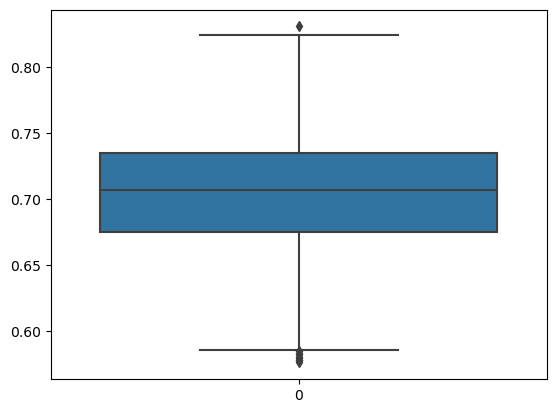

In [66]:
sns.boxplot(df["Extent"])  # Outliers replaced

In [67]:
df[(df["Extent"] < lowertail) | (df["Extent"] > uppertail)]

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class


<Axes: >

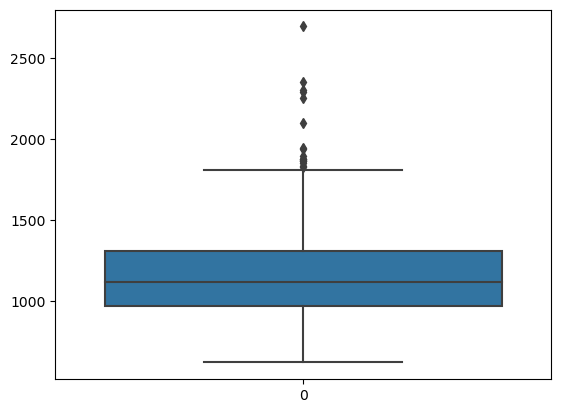

In [68]:
sns.boxplot(df["Perimeter"])  # outliers are present

In [69]:
q1 = df["Perimeter"].quantile(0.25)
q2 = df["Perimeter"].quantile(0.50)
q3 = df["Perimeter"].quantile(0.75)

iqr = q3-q1

In [70]:
lowertail = q1 - 1.5*iqr
lowertail

453.44224999999994

In [71]:
uppertail = q3 + 1.5*iqr
uppertail

1821.3582500000002

In [72]:
df[(df["Perimeter"] < lowertail) | (df["Perimeter"] > uppertail)]

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
85,82722.30617,423.952366,323.190569,0.923770,85668.702797,0.703530,2253.557,Kecimen
290,136340.00000,423.952366,311.341355,0.902490,176818.000000,0.703530,2098.263,Kecimen
469,82722.30617,423.952366,335.790452,0.895656,85668.702797,0.728769,1893.414,Besni
479,82722.30617,636.752437,250.225462,0.773310,85668.702797,0.613785,1870.280,Besni
487,82722.30617,423.952366,367.279532,0.927737,85668.702797,0.703530,2697.753,Besni
506,82722.30617,423.952366,271.872395,0.962124,85668.702797,0.703530,2303.690,Besni
516,82722.30617,684.602958,250.225462,0.832080,85668.702797,0.717219,1827.900,Besni
574,82722.30617,423.952366,321.685834,0.908407,85668.702797,0.605916,1865.297,Besni
580,82722.30617,713.472549,250.225462,0.851905,85668.702797,0.780576,1866.091,Besni
668,82722.30617,423.952366,355.300685,0.879347,85668.702797,0.745809,1876.028,Besni


In [73]:
# now we will replace the outliers with mean of the above data

mean_without_outliers_P = df[(df["Perimeter"]<uppertail) & (df["Perimeter"] > lowertail)]["Perimeter"].mean()

mean_without_outliers_P

1149.116831257078

In [74]:
# Replacing the outliers

df.loc[df["Perimeter"] > uppertail,"Perimeter"]= mean_without_outliers_P
df.loc[df["Perimeter"] < lowertail,"Perimeter"] = mean_without_outliers_P
df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524.0,442.246011,253.291155,0.819738,90546.0,0.758651,1184.040,Kecimen
1,75166.0,406.690687,243.032436,0.801805,78789.0,0.684130,1121.786,Kecimen
2,90856.0,442.267048,266.328318,0.798354,93717.0,0.637613,1208.575,Kecimen
3,45928.0,286.540559,208.760042,0.684989,47336.0,0.699599,844.162,Kecimen
4,79408.0,352.190770,290.827533,0.794755,81463.0,0.792772,1073.251,Kecimen
...,...,...,...,...,...,...,...,...
895,83248.0,430.077308,247.838695,0.817263,85839.0,0.668793,1129.072,Besni
896,87350.0,440.735698,259.293149,0.808629,90899.0,0.636476,1214.252,Besni
897,99657.0,431.706981,298.837323,0.721684,106264.0,0.741099,1292.828,Besni
898,93523.0,476.344094,254.176054,0.845739,97653.0,0.658798,1258.548,Besni


<Axes: >

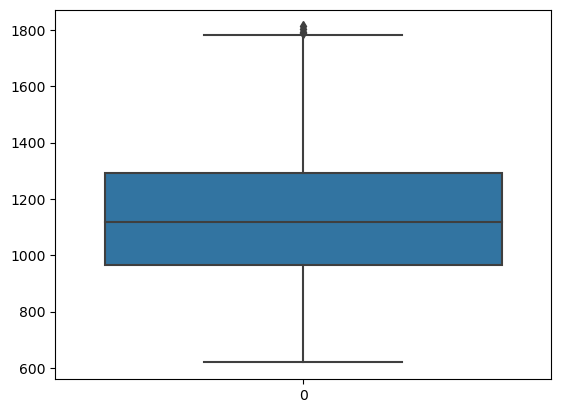

In [75]:
sns.boxplot(df["Perimeter"])  # outliers are present

In [76]:
df[(df["Perimeter"] < lowertail) | (df["Perimeter"] > uppertail)]

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class


## Feature Engineering

In [77]:
# target column
df["Class"].unique()

array(['Kecimen', 'Besni'], dtype=object)

In [78]:
df["Class"].replace({'Kecimen':0, 'Besni':1},inplace=True)
df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524.0,442.246011,253.291155,0.819738,90546.0,0.758651,1184.040,0
1,75166.0,406.690687,243.032436,0.801805,78789.0,0.684130,1121.786,0
2,90856.0,442.267048,266.328318,0.798354,93717.0,0.637613,1208.575,0
3,45928.0,286.540559,208.760042,0.684989,47336.0,0.699599,844.162,0
4,79408.0,352.190770,290.827533,0.794755,81463.0,0.792772,1073.251,0
...,...,...,...,...,...,...,...,...
895,83248.0,430.077308,247.838695,0.817263,85839.0,0.668793,1129.072,1
896,87350.0,440.735698,259.293149,0.808629,90899.0,0.636476,1214.252,1
897,99657.0,431.706981,298.837323,0.721684,106264.0,0.741099,1292.828,1
898,93523.0,476.344094,254.176054,0.845739,97653.0,0.658798,1258.548,1


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    float64
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    float64
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 56.4 KB


### Assumption : No multicolinearity

In [80]:
vif_df = pd.DataFrame()

df1 = df.iloc[:,:7]

vif_df["Independant Variables"] = df1.columns

vif_df

,Independant Variables
0,Area
1,MajorAxisLength
2,MinorAxisLength
3,Eccentricity
4,ConvexArea
5,Extent
6,Perimeter


In [81]:
vif_list = []

for i in range(df1.shape[1]):
    vif = variance_inflation_factor(df1.to_numpy(),i)
    vif_list.append(vif)
    
vif_list

[684.2374866657727,
 208.38595314401334,
 140.4217401483309,
 124.02128753814169,
 711.3841192775709,
 143.3203983437465,
 342.68638591284093]

In [82]:
vif_df["VIF"] = vif_list

In [83]:
vif_df

,Independant Variables,VIF
0,Area,684.237487
1,MajorAxisLength,208.385953
2,MinorAxisLength,140.421740
3,Eccentricity,124.021288
4,ConvexArea,711.384119
5,Extent,143.320398
6,Perimeter,342.686386


### Feature Selection

In [84]:
df.corr()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
Area,1.000000,0.845168,0.833156,0.359896,0.993819,0.019559,0.888368,0.627701
MajorAxisLength,0.845168,1.000000,0.660050,0.544185,0.851022,-0.060864,0.944512,0.700677
MinorAxisLength,0.833156,0.660050,1.000000,0.052222,0.825132,0.148919,0.765214,0.483005
Eccentricity,0.359896,0.544185,0.052222,1.000000,0.366316,-0.248542,0.433409,0.436327
ConvexArea,0.993819,0.851022,0.825132,0.366316,1.000000,0.006837,0.894808,0.634809
Extent,0.019559,-0.060864,0.148919,-0.248542,0.006837,1.000000,-0.018073,-0.115490
Perimeter,0.888368,0.944512,0.765214,0.433409,0.894808,-0.018073,1.000000,0.699311
Class,0.627701,0.700677,0.483005,0.436327,0.634809,-0.115490,0.699311,1.000000


<Axes: >

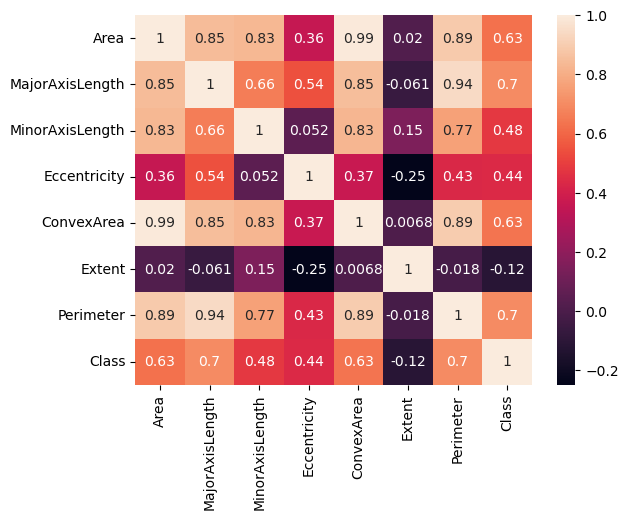

In [85]:
sns.heatmap(df.corr(), annot=True)

C:\Users\manea\anaconda3\PYTHON\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


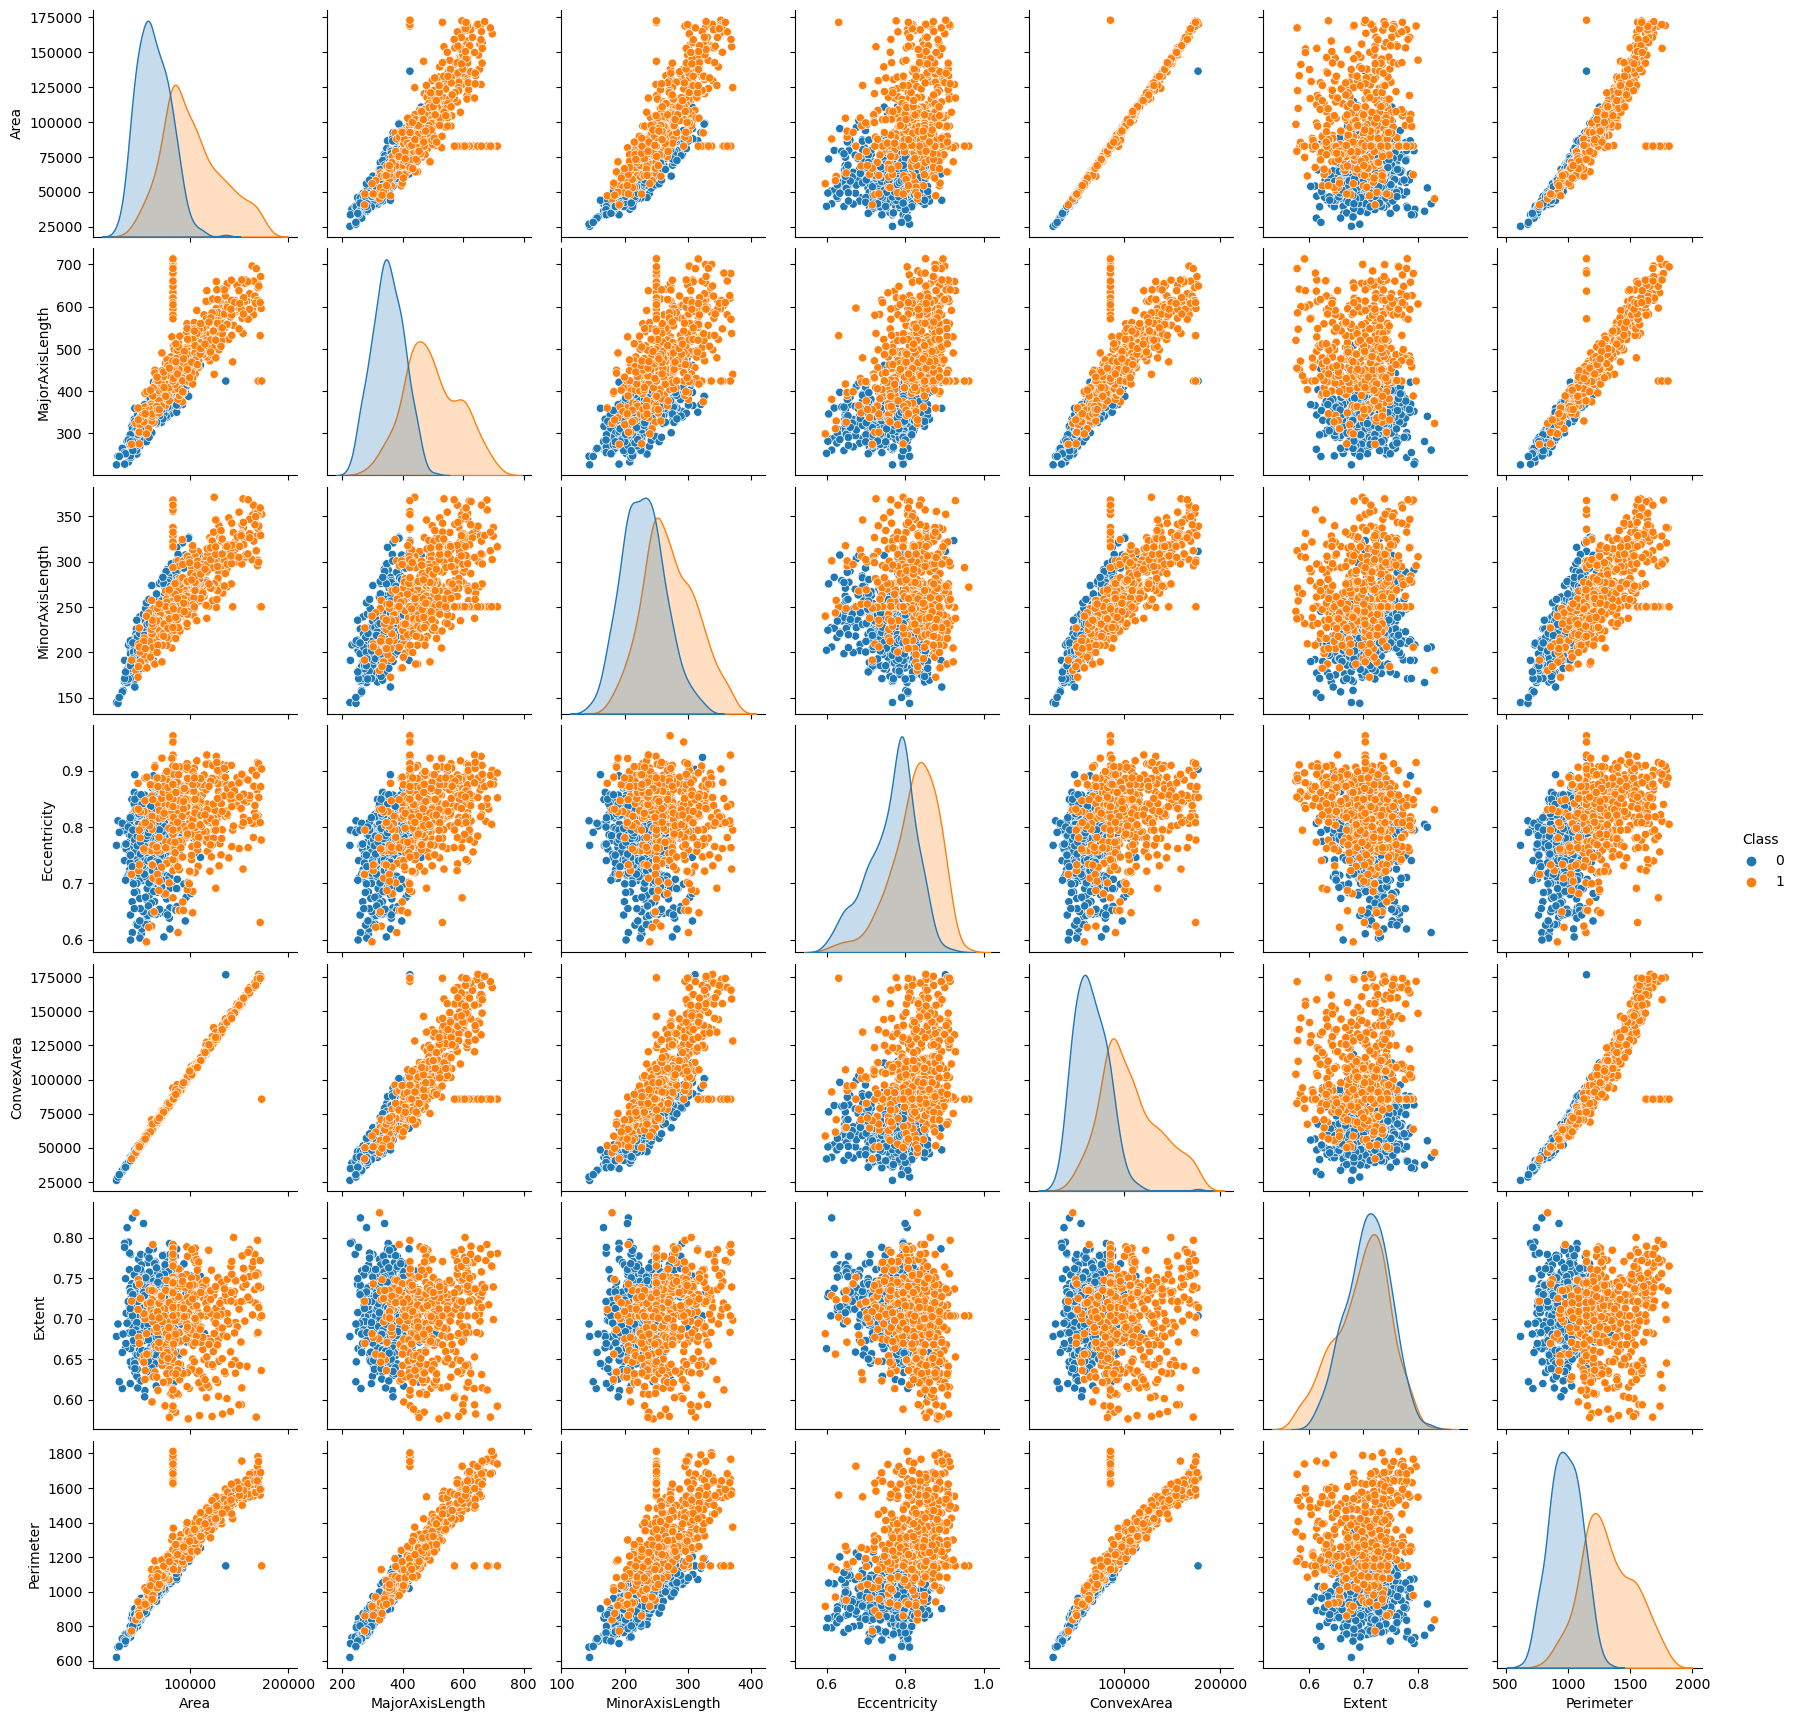

In [86]:
sns.pairplot(df,hue="Class")

C:\Users\manea\anaconda3\PYTHON\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


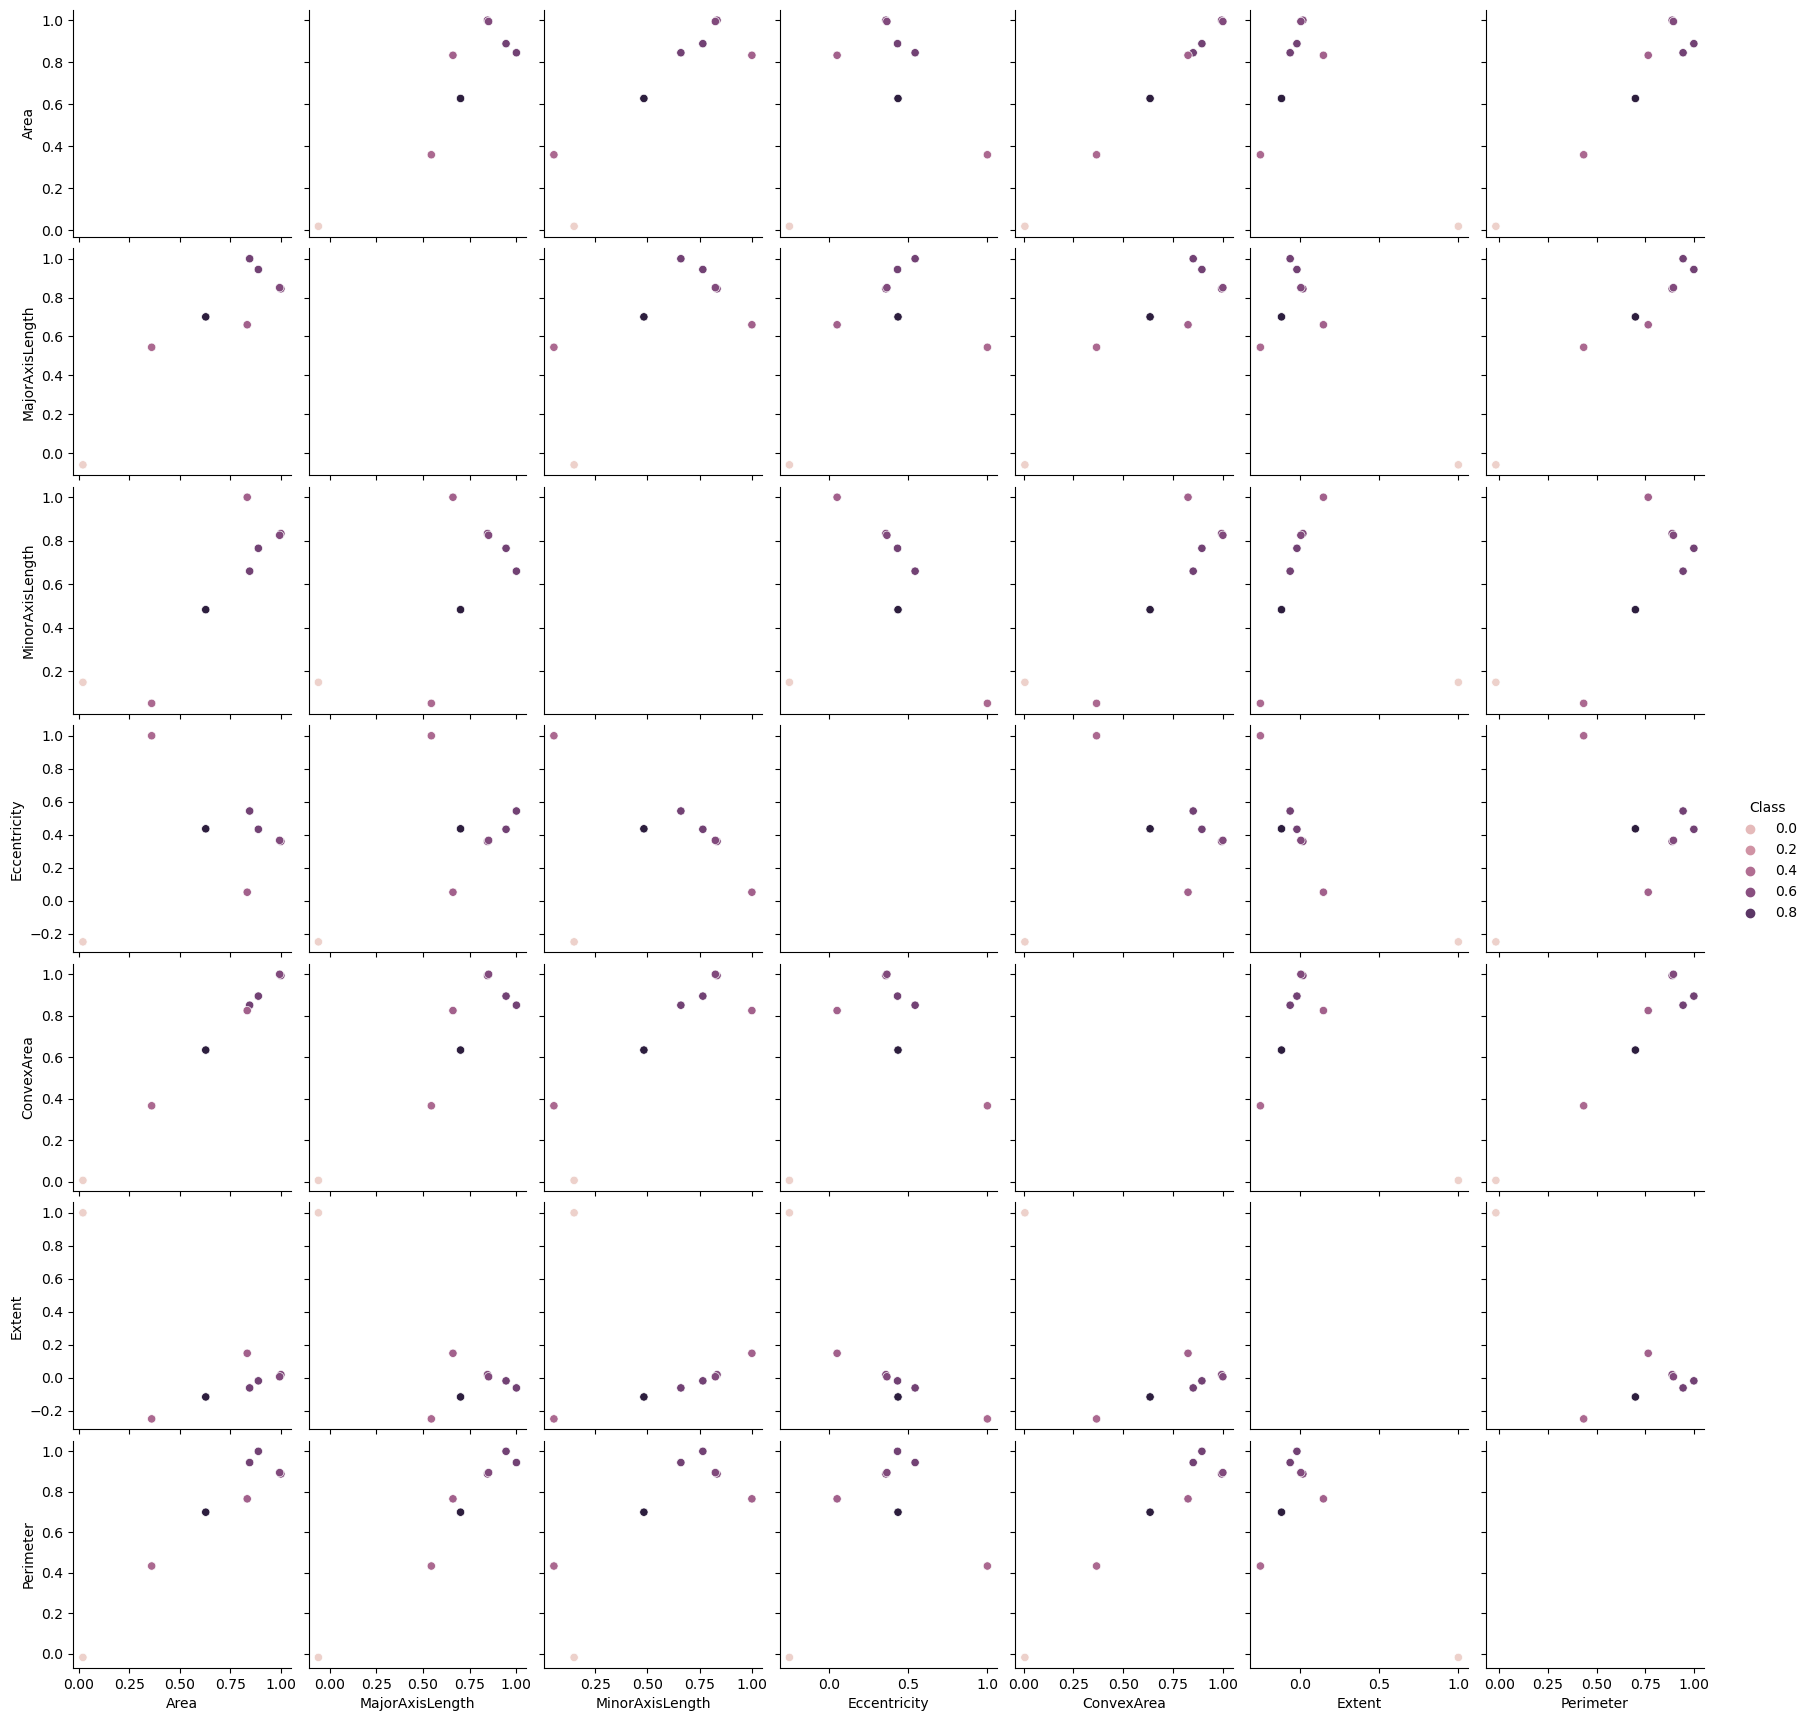

In [87]:
sns.pairplot(df.corr(),hue="Class")

In [88]:
x = df1 #independant features
y = df["Class"] #dependant features/target column

In [89]:
df["Class"].value_counts()

Class
0    450
1    450
Name: count, dtype: int64

#### SPLITTING TRAIN TEST DATA

In [90]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)

### ALGORITHM 1. LOGISTIC REGRESSION

#### MODEL TRAINING

In [91]:
log_reg = LogisticRegression()
log_reg

LogisticRegression()

In [92]:
log_reg_model = log_reg.fit(xtrain,ytrain)
log_reg_model

LogisticRegression()

#### MODEL EVALUATION

In [93]:
ytrain

183    0
774    1
299    0
331    0
563    1
      ..
423    0
347    0
91     0
489    1
828    1
Name: Class, Length: 720, dtype: int64

In [94]:
ytrain_predict = log_reg_model.predict(xtrain)
ytrain_predict

array([0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,

In [95]:
# On training data

accuracy = accuracy_score(ytrain,ytrain_predict)
print("Accuracy : ", accuracy)

print("-"*50)

print(multilabel_confusion_matrix(ytrain,ytrain_predict))
print("-"*50)

clf_rep = classification_report(ytrain,ytrain_predict)
print(clf_rep)

Accuracy :  0.8319444444444445
--------------------------------------------------
[[[283  71]
  [ 50 316]]

 [[316  50]
  [ 71 283]]]
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       366
           1       0.85      0.80      0.82       354

    accuracy                           0.83       720
   macro avg       0.83      0.83      0.83       720
weighted avg       0.83      0.83      0.83       720



In [96]:
# on testing data

ytest_predict = log_reg_model.predict(xtest)
ytest_predict

array([1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0], dtype=int64)

In [97]:
accuracy = accuracy_score(ytest,ytest_predict)
print("Accuracy : ", accuracy)

print("-"*50)

print(multilabel_confusion_matrix(ytest,ytest_predict))
print("-"*50)

clf_rep = classification_report(ytest,ytest_predict)
print(clf_rep)

Accuracy :  0.8277777777777777
--------------------------------------------------
[[[79 17]
  [14 70]]

 [[70 14]
  [17 79]]]
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.83      0.82        84
           1       0.85      0.82      0.84        96

    accuracy                           0.83       180
   macro avg       0.83      0.83      0.83       180
weighted avg       0.83      0.83      0.83       180



### ALGORITHM 2.DECISION TREE

In [98]:
dt_clf = DecisionTreeClassifier()
dt_clf_model = dt_clf.fit(xtrain,ytrain)
dt_clf_model

DecisionTreeClassifier()

#### MODEL EVALUATION

In [99]:
## For Training Data

ytrain_pred = dt_clf_model.predict(xtrain)

Accuracy : 1.0
************************************************************
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       366
           1       1.00      1.00      1.00       354

    accuracy                           1.00       720
   macro avg       1.00      1.00      1.00       720
weighted avg       1.00      1.00      1.00       720



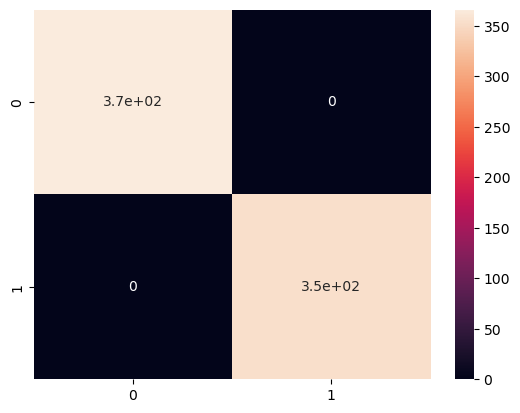

In [100]:

acc = accuracy_score(ytrain,ytrain_pred)
print(f"Accuracy : {acc}")
print("*"*60)

sns.heatmap(confusion_matrix(ytrain,ytrain_pred),annot = True)

clf_rpt = classification_report(ytrain,ytrain_pred)
print(f"Classification Report : \n",clf_rpt)

[Text(0.5461538461538461, 0.96875, 'x[6] <= 1127.649\ngini = 0.5\nsamples = 720\nvalue = [366, 354]\nclass = Kecimen'),
 Text(0.24615384615384617, 0.90625, 'x[3] <= 0.871\ngini = 0.231\nsamples = 368\nvalue = [319, 49]\nclass = Kecimen'),
 Text(0.18974358974358974, 0.84375, 'x[5] <= 0.827\ngini = 0.199\nsamples = 357\nvalue = [317, 40]\nclass = Kecimen'),
 Text(0.1794871794871795, 0.78125, 'x[6] <= 913.493\ngini = 0.195\nsamples = 356\nvalue = [317, 39]\nclass = Kecimen'),
 Text(0.07692307692307693, 0.71875, 'x[1] <= 331.473\ngini = 0.08\nsamples = 120\nvalue = [115, 5]\nclass = Kecimen'),
 Text(0.05128205128205128, 0.65625, 'x[3] <= 0.734\ngini = 0.067\nsamples = 116\nvalue = [112, 4]\nclass = Kecimen'),
 Text(0.03076923076923077, 0.59375, 'x[3] <= 0.733\ngini = 0.139\nsamples = 40\nvalue = [37, 3]\nclass = Kecimen'),
 Text(0.020512820512820513, 0.53125, 'x[3] <= 0.716\ngini = 0.097\nsamples = 39\nvalue = [37, 2]\nclass = Kecimen'),
 Text(0.010256410256410256, 0.46875, 'gini = 0.0\nsa

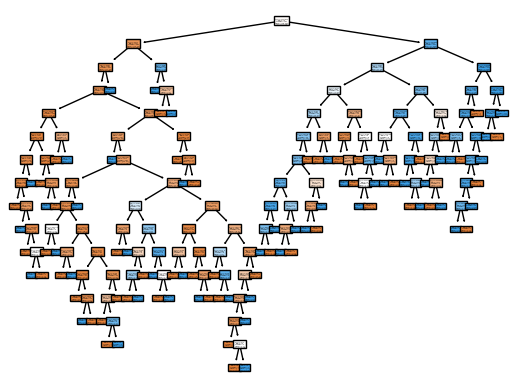

In [101]:
plot_tree(dt_clf_model,filled=True,class_names=["Kecimen","Besni"])

Accuracy : 0.8
************************************************************
Classification Report : 
               precision    recall  f1-score   support

           0       0.79      0.77      0.78        84
           1       0.81      0.82      0.81        96

    accuracy                           0.80       180
   macro avg       0.80      0.80      0.80       180
weighted avg       0.80      0.80      0.80       180



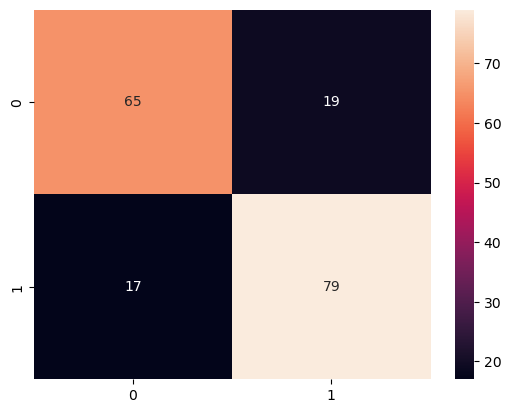

In [102]:
## For Testing Data

ytest_pred = dt_clf_model.predict(xtest)

acc = accuracy_score(ytest,ytest_pred)
print(f"Accuracy : {acc}")
print("*"*60)

sns.heatmap(confusion_matrix(ytest,ytest_pred),annot = True)

clf_rpt = classification_report(ytest,ytest_pred)
print(f"Classification Report : \n",clf_rpt)

### Decision Tree By using Hyperparameter Tunning

In [103]:
# 1) Hyper parameter tunning

hyperparameters = {"criterion" : ["entropy","gini"],
                  "max_depth" : np.arange(2,15),
                  "min_samples_split" : np.arange(3,15),
                  "min_samples_leaf" : np.arange(2,10)}

In [104]:
gscv = GridSearchCV(dt_clf_model,hyperparameters,cv=4)
gscv.fit(xtrain,ytrain)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [105]:
gscv.best_estimator_

DecisionTreeClassifier(max_depth=2, min_samples_leaf=2, min_samples_split=3)

In [106]:
dt_clf_hyp = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5,
                       min_samples_split=3)

In [107]:
dt_clf_hyp_model = dt_clf_hyp.fit(xtrain,ytrain)
dt_clf_hyp_model

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5,
                       min_samples_split=3)

### Evaluating after hyper parameter application :

Accuracy : 0.8986111111111111
************************************************************
Classification Report : 
               precision    recall  f1-score   support

           0       0.87      0.94      0.90       366
           1       0.93      0.86      0.89       354

    accuracy                           0.90       720
   macro avg       0.90      0.90      0.90       720
weighted avg       0.90      0.90      0.90       720



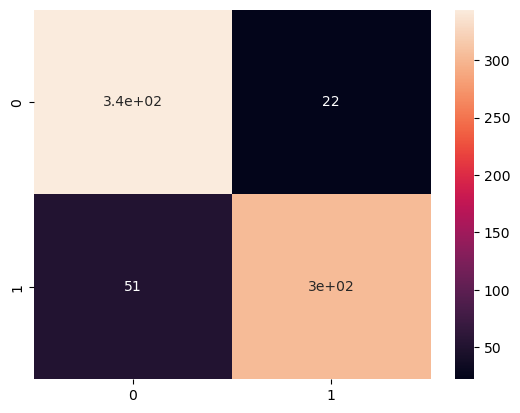

In [108]:
## For Training Data


ytrain_pred = dt_clf_hyp_model.predict(xtrain)


acc = accuracy_score(ytrain,ytrain_pred)
print(f"Accuracy : {acc}")
print("*"*60)

sns.heatmap(confusion_matrix(ytrain,ytrain_pred),annot = True)

clf_rpt = classification_report(ytrain,ytrain_pred)
print(f"Classification Report : \n",clf_rpt)

Accuracy : 0.8388888888888889
************************************************************
Classification Report : 
               precision    recall  f1-score   support

           0       0.77      0.93      0.84        84
           1       0.92      0.76      0.83        96

    accuracy                           0.84       180
   macro avg       0.85      0.84      0.84       180
weighted avg       0.85      0.84      0.84       180



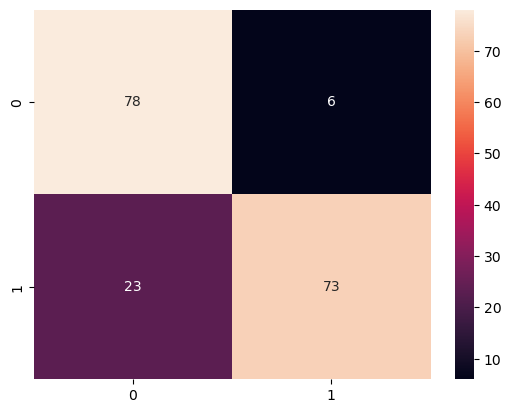

In [109]:
## For Testing Data

ytest_pred = dt_clf_hyp_model.predict((xtest))

acc = accuracy_score(ytest,ytest_pred)
print(f"Accuracy : {acc}")
print("*"*60)

sns.heatmap(confusion_matrix(ytest,ytest_pred),annot = True)

clf_rpt = classification_report(ytest,ytest_pred)
print(f"Classification Report : \n",clf_rpt)

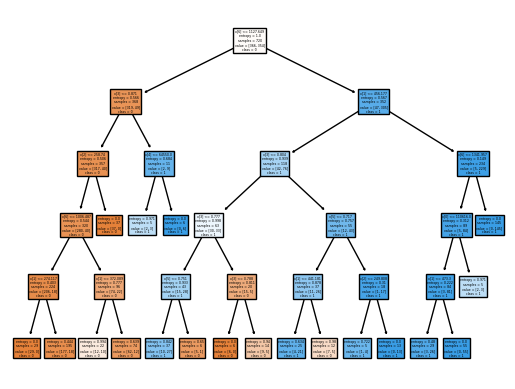

In [110]:
plot_tree(dt_clf_hyp_model,class_names=["0","1"], filled=True)
plt.savefig("dt_hyp.png")

### Ensemble method

### ALGORITHM 3.RANDOM FOREST

#### MODEL TRAINING

In [111]:
rf_clf = RandomForestClassifier()
rf_clf

RandomForestClassifier()

In [112]:
rf_clf_model = rf_clf.fit(xtrain,ytrain)
rf_clf_model

RandomForestClassifier()

#### MODEL EVALUATION

In [113]:
ytrain

183    0
774    1
299    0
331    0
563    1
      ..
423    0
347    0
91     0
489    1
828    1
Name: Class, Length: 720, dtype: int64

In [114]:
ytrain_pred_r = rf_clf_model.predict(xtrain)
ytrain_pred_r

array([0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,

Accuracy : 1.0
************************************************************
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       366
           1       1.00      1.00      1.00       354

    accuracy                           1.00       720
   macro avg       1.00      1.00      1.00       720
weighted avg       1.00      1.00      1.00       720

************************************************************


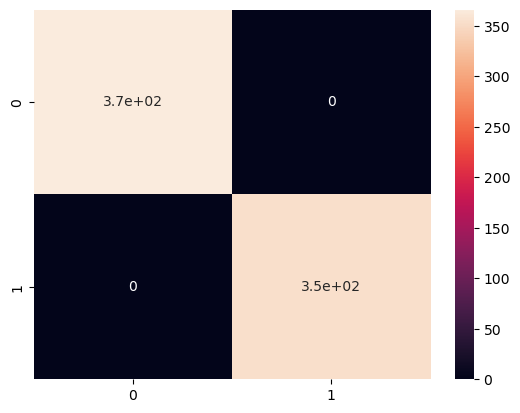

In [115]:
## For Training Data

acc_rf = accuracy_score(ytrain,ytrain_pred_r)
print(f"Accuracy : {acc_rf}")
print("*"*60)

sns.heatmap(confusion_matrix(ytrain,ytrain_pred_r),annot = True)


clf_rpt_rf = classification_report(ytrain,ytrain_pred_r)
print(f"Classification Report : \n",clf_rpt_rf)
print("*"*60)

In [116]:
ytest

618    1
180    0
530    1
310    0
571    1
      ..
101    0
780    1
211    0
885    1
415    0
Name: Class, Length: 180, dtype: int64

In [117]:
ytest_pred_rf = rf_clf_model.predict(xtrain)
ytest_pred_rf

array([0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,

Accuracy : 0.8388888888888889
************************************************************
Classification Report : 
               precision    recall  f1-score   support

           0       0.77      0.93      0.84        84
           1       0.92      0.76      0.83        96

    accuracy                           0.84       180
   macro avg       0.85      0.84      0.84       180
weighted avg       0.85      0.84      0.84       180



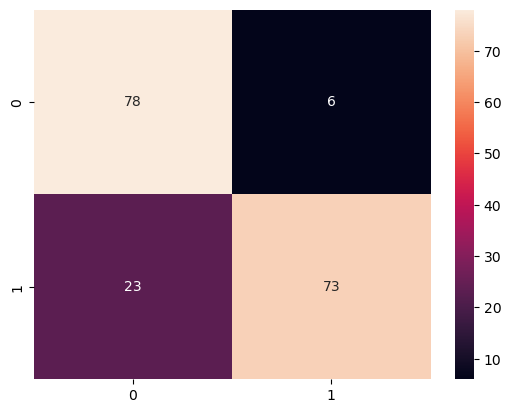

In [118]:
## For Testing Data

acc_rf = accuracy_score(ytest,ytest_pred)
print(f"Accuracy : {acc_rf}")
print("*"*60)

sns.heatmap(confusion_matrix(ytest,ytest_pred),annot = True)

clf_rpt_rf = classification_report(ytest,ytest_pred)
print(f"Classification Report : \n",clf_rpt_rf)

#### Random Forest with Hyperparameter Tunning

In [119]:
hyperparameters = {"criterion" : ["entropy","gini"],
                  "max_depth" : np.arange(2,12),
                  "min_samples_split" : np.arange(3,12),
                  "min_samples_leaf" : np.arange(2,12),
                  "n_estimators": np.arange(2,100)}

In [120]:
rscv = RandomizedSearchCV(rf_clf_model,hyperparameters,cv=5)
rscv

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
                                        'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
                                        'min_samples_split': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11]),
                                        'n_estimators': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69,
       70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86,
       87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [121]:
rscv.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
                                        'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
                                        'min_samples_split': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11]),
                                        'n_estimators': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69,
       70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86,
       87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [122]:
rscv.best_estimator_

RandomForestClassifier(max_depth=9, min_samples_leaf=4, min_samples_split=11,
                       n_estimators=29)

In [123]:
rf_clf_hyp = RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5,
                       min_samples_split=3)

rf_clf_hyp_model = rf_clf_hyp.fit(xtrain,ytrain)
rf_clf_hyp_model

RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5,
                       min_samples_split=3)

### MODEL EVALUATION

In [124]:
ytrain_pred_rfh = rf_clf_hyp_model.predict(xtrain)

Accuracy : 0.8958333333333334
************************************************************
Classification Report : 
               precision    recall  f1-score   support

           0       0.87      0.94      0.90       366
           1       0.93      0.85      0.89       354

    accuracy                           0.90       720
   macro avg       0.90      0.90      0.90       720
weighted avg       0.90      0.90      0.90       720

************************************************************


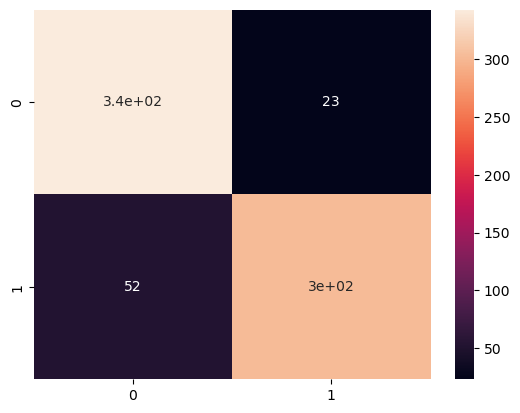

In [125]:
## For Training Data

acc_rh = accuracy_score(ytrain,ytrain_pred_rfh)
print(f"Accuracy : {acc_rh}")
print("*"*60)

sns.heatmap(confusion_matrix(ytrain,ytrain_pred_rfh),annot = True)


clf_rpt_rh = classification_report(ytrain,ytrain_pred_rfh)
print(f"Classification Report : \n",clf_rpt_rh)
print("*"*60)

In [126]:
ytest_pred_rfh = rf_clf_hyp_model.predict(xtest)

Accuracy : 0.8555555555555555
************************************************************
Classification Report : 
               precision    recall  f1-score   support

           0       0.87      0.94      0.90       366
           1       0.93      0.85      0.89       354

    accuracy                           0.90       720
   macro avg       0.90      0.90      0.90       720
weighted avg       0.90      0.90      0.90       720



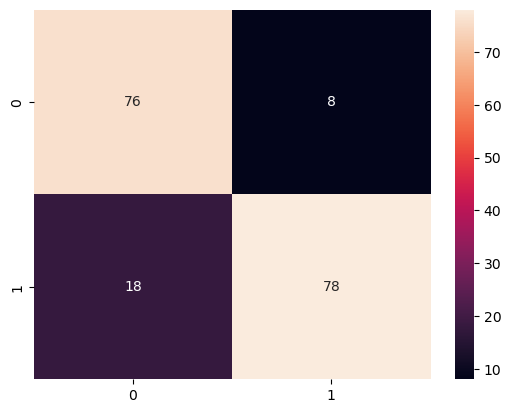

In [127]:
## For Testing Data

acc_rh = accuracy_score(ytest,ytest_pred_rfh)
print(f"Accuracy : {acc_rh}")
print("*"*60)

sns.heatmap(confusion_matrix(ytest,ytest_pred_rfh),annot = True)

clf_rpt = classification_report(ytest,ytest_pred_rfh)
print(f"Classification Report : \n",clf_rpt_rh)

### ALGORITHM 4.ADA BOOST

In [128]:
ab_clf = AdaBoostClassifier()
ab_clf

AdaBoostClassifier()

In [129]:
ab_clf_model = ab_clf.fit(xtrain,ytrain)
ab_clf_model

AdaBoostClassifier()

### Model Evaluation

In [130]:
## For Training Data

ytrain_predict = ab_clf_model.predict(xtrain)

Accuracy : 0.9125
************************************************************
Classification Report : 
               precision    recall  f1-score   support

           0       0.89      0.95      0.92       366
           1       0.94      0.88      0.91       354

    accuracy                           0.91       720
   macro avg       0.91      0.91      0.91       720
weighted avg       0.91      0.91      0.91       720

************************************************************


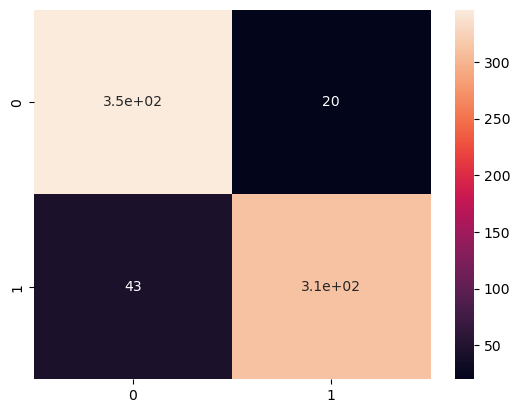

In [131]:
acc = accuracy_score(ytrain,ytrain_predict)
print(f"Accuracy : {acc}")
print("*"*60)

sns.heatmap(confusion_matrix(ytrain,ytrain_predict),annot = True)


clf_rpt = classification_report(ytrain,ytrain_predict)
print(f"Classification Report : \n",clf_rpt)
print("*"*60)

In [132]:
## For Testing Data

ytest_predict = ab_clf_model.predict(xtest)

Accuracy : 0.8555555555555555
************************************************************
Classification Report : 
               precision    recall  f1-score   support

           0       0.81      0.90      0.85        84
           1       0.91      0.81      0.86        96

    accuracy                           0.86       180
   macro avg       0.86      0.86      0.86       180
weighted avg       0.86      0.86      0.86       180



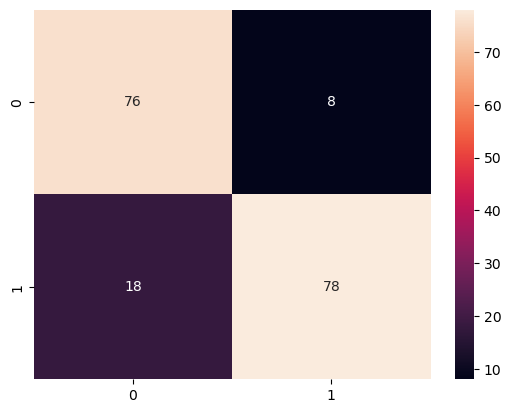

In [135]:
acc = accuracy_score(ytest,ytest_predict)
print(f"Accuracy : {acc}")
print("*"*60)

sns.heatmap(confusion_matrix(ytest,ytest_predict),annot = True)

clf_rpt = classification_report(ytest,ytest_predict)
print(f"Classification Report : \n",clf_rpt)

### Ada Boost with hyperparameter tunning

In [136]:
hyp = {"n_estimators" : np.arange(5,50),
    "learning_rate" : [0,0.1,0.01,1]}

In [137]:
rscv = RandomizedSearchCV(ab_clf_model,hyp,cv=4)
rscv.fit(xtrain,ytrain)

C:\Users\manea\anaconda3\PYTHON\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
16 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
16 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\manea\anaconda3\PYTHON\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\manea\anaconda3\PYTHON\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\manea\anaconda3\PYTHON\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\manea\

RandomizedSearchCV(cv=4, estimator=AdaBoostClassifier(),
                   param_distributions={'learning_rate': [0, 0.1, 0.01, 1],
                                        'n_estimators': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [138]:
rscv.best_estimator_

AdaBoostClassifier(learning_rate=0.1, n_estimators=40)

In [139]:
ab_clf = AdaBoostClassifier(learning_rate=0.1, n_estimators=34)
ab_clf

AdaBoostClassifier(learning_rate=0.1, n_estimators=34)

In [140]:
ab_clf_hyp_model = ab_clf.fit(xtrain,ytrain)
ab_clf_hyp_model

AdaBoostClassifier(learning_rate=0.1, n_estimators=34)

### Model evaluation

In [141]:
## For Training Data

ytrain_predict = ab_clf_hyp_model.predict(xtrain)

Accuracy : 0.875
************************************************************
Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.92      0.88       366
           1       0.91      0.83      0.87       354

    accuracy                           0.88       720
   macro avg       0.88      0.87      0.87       720
weighted avg       0.88      0.88      0.87       720

************************************************************


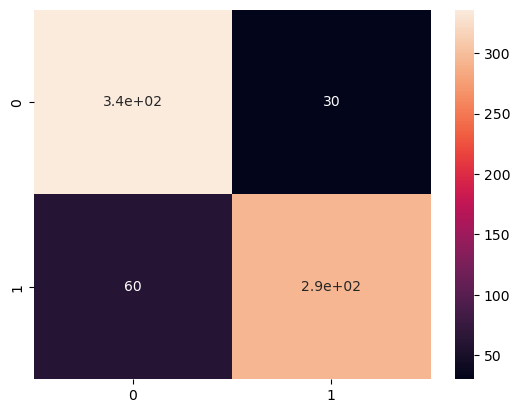

In [142]:
acc = accuracy_score(ytrain,ytrain_predict)
print(f"Accuracy : {acc}")
print("*"*60)

sns.heatmap(confusion_matrix(ytrain,ytrain_predict),annot = True)


clf_rpt = classification_report(ytrain,ytrain_predict)
print(f"Classification Report : \n",clf_rpt)
print("*"*60)

Accuracy : 0.85
************************************************************
Classification Report : 
               precision    recall  f1-score   support

           0       0.81      0.89      0.85        84
           1       0.90      0.81      0.85        96

    accuracy                           0.85       180
   macro avg       0.85      0.85      0.85       180
weighted avg       0.85      0.85      0.85       180



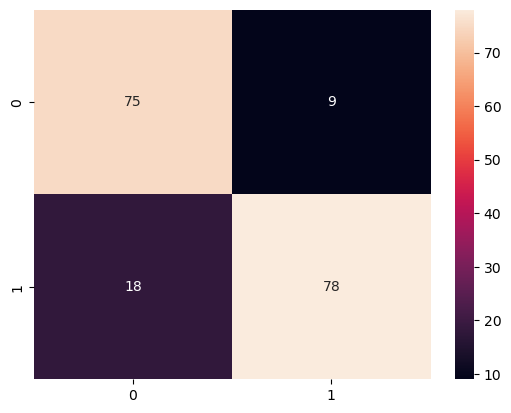

In [143]:
## For Testing Data

ytest_predict = ab_clf_hyp_model.predict(xtest)

acc = accuracy_score(ytest,ytest_predict)
print(f"Accuracy : {acc}")
print("*"*60)

sns.heatmap(confusion_matrix(ytest,ytest_predict),annot = True)

clf_rpt = classification_report(ytest,ytest_predict)
print(f"Classification Report : \n",clf_rpt)

### SAVING MODEL INTO PICKLE FILE

In [149]:
import pickle

In [150]:
with open("class_pred_model.pkl","wb") as f:
    pickle.dump(rf_clf_hyp_model,f)

In [151]:
# Taking input

def class_prediction_dt(Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter):
    test_df_ = pd.DataFrame({"Area":Area,
                           "MajorAxisLength":MajorAxisLength,
                            "MinorAxisLength":MinorAxisLength,
                           "Eccentricity":Eccentricity,
                           "ConvexArea":ConvexArea,
                           "Extent":Extent,
                           "Perimeter":Perimeter},index=[0])
    
    with open("class_pred_model.pkl","rb") as f:
        final_model = pickle.load(f)
        
    predictions = final_model.predict(test_df_)
    if predictions[0] == 0:
        print(f"Raisin Class is Kecimen")
    else:
        print(f"Raisin Class is Bensi")
    

In [152]:
class_prediction_dt(50000,268,208,0.89,90546,0.68,1123)

Raisin Class is Kecimen


In [153]:
class_prediction_dt(68245,268,111,0.99,52000,0.99,1800)

Raisin Class is Bensi
